In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import googleapiclient.discovery
from google.oauth2 import service_account
import json

In [8]:
def predict_json(project, model, instances, version=None):
    scopes = ['https://www.googleapis.com/auth/cloud-platform']
    sa_file = 'D:\\Nude Model-443742bbc7f7.json'

    credentials = service_account.Credentials.from_service_account_file(sa_file, scopes=scopes)

    service = googleapiclient.discovery.build('ml', 'v1', credentials=credentials)
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [9]:
def predict_single_image(image_file):
    
    image_data = tf.keras.preprocessing.image.load_img(image_file, target_size=(299, 299))

    # Convert the loaded image file to a numpy array
    image_array = tf.keras.preprocessing.image.img_to_array(image_data)
    image_array /= 255

    plt.imshow(image_array);
    plt.axis('off');

    x_train = []
    x_train.append(image_array)
    x_test = np.array(x_train)

    return x_test.tolist()

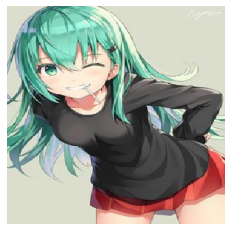

In [10]:
instances = predict_single_image(r'C:\\Users\\guilo\\mba-tcc\\data\\validate\\safest\\safest_0.jpg')

In [11]:
with open('instances.json', 'w') as instances_file:
    json.dump({"instances": instances}, instances_file)

In [12]:
result = predict_json('nude-model', "nude_tcc", instances)

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [5]:
def explicit():
    from google.cloud import storage

    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(
        'D:\\Nude Model-443742bbc7f7.json')

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [6]:
explicit()

[<Bucket: nude_model>]


In [3]:
# Convert the model


converter = tf.lite.TFLiteConverter.from_saved_model('./modelos/gerados/nude_classifier_saved/1') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)